# Theoretical Background

In this case, the motion of the pendulum can be described by the following set of first-order differential equations:

$$ \frac{d\omega}{dt} = -\frac{g}{l}\theta $$
$$ \frac{d\theta}{dt} = \omega $$

Where:

$\theta$: The angle the pendulum makes with the normal of the surface, from which it hangs.

$\omega$: The angular velocity of the pendulum.

According to Euler's method, the values of $\omega$ and $\theta$ can be approximated as:

$$\omega_{i+1} = \omega_{i} - \frac{g}{l}.\theta_i.\Delta t$$
$$\theta_{i+1} = \theta_{i} + \omega_i.\Delta t$$

Where:

$\omega_{i}$ = $\omega(t_i)$

$\theta{i}$ = $\theta(t_i)$

and $t_{i} = t_{0} + i.\Delta t$

Whereas, the Euler-Cromer method approximates $\omega_{i+1}$ and $\theta_{i+1}$ as:

$$\omega_{i+1} = \omega_{i} - \frac{g}{l}.\theta_i.\Delta t$$
$$\theta_{i+1} = \theta_{i} + \omega_{i+1}.\Delta t$$

The key difference between the Euler and the Euler-Cromer method, is that Euler's method uses $\omega_{i}$ to calculate $\theta_{i+1}$, whereas the Euler-Cromer method uses $\omega_{i+1}$ to calculate $\theta_{i+1}$. The Euler-Cromer method thus corrects Euler's method, since $\theta_{i+1}$ is dependent on $\omega_{i+1}$ and not $\omega_{i}$.

# Method

The values of $\omega$ and $\theta$ can be calculated with a very straightforward algorithm.

Consider the following pseudo-code:

## Pseudo-code:

Let g = 9.8 be the gravitational acceleration constant.

Let l = 1 be the length of the string.

Let t = [t0, t0+dt, ..., t_end]

Let N = length(t)

Let theta = theta0

Where: theta0 -> Starting angle

Let omega = omega0

Where: omega0 -> Starting angle

dt -> Time Step

if Euler method:

    for i to N:
    
        append (omega[i] - (g/l).theta[i]*dt) --> omega
        
        append (theta[i] + omega[i]*dt) -->t theta

if Euler-Cromer method:

    for i to N:
    
        append (omega[i] - (g/l).theta[i]*dt) --> omega
        
        append (theta[i] + omega[i+1]*dt) --> theta

# Code Implementation

## Import Libraries

To implement the code, first import all the necessary Python libraries.

In [1]:
import numpy as np # For scientific computing
import matplotlib.pyplot as plt # For data visualisation
import math # To use mathematical functions

## Python Method for the Simple Pendulum Motion

The algorithm is placed inside a uniquely defined Python function for convenience, and also to avoid any unecessary coding. The function follows the pseudo-code.

In [2]:
def simple_Pendulum(theta0, omega0, t_end, dt, method):
    
    '''
    Parameters:
    -----------
    
    theta0: Initial angle
    omega0: Initial angular velocity
    t_end: Time duration
    dt: Time-step
    method: Specifies the numerical method to be used. 
        'E' -> Euler Method,
        'EC' -> Euler-Cromer Method
    '''
    
    # Gravitational acceleration constant
    g = 9.8
    
    # Length of the string holding the weight
    l = 1 
    
    # Amount of steps
    N = int((t_end)/dt)
    
    # Time array
    t = np.linspace(0, t_end, N+1) 
    
    # Array for angles
    omega = [omega0]
    
    # Array for angular velocities
    theta = [theta0] 

    # -----------------------------------------------
    # Calculate the numerical solution (Euler Method)
    # -----------------------------------------------
    if method is 'E':
        for i in range(0,N):
            omega = np.append(omega, omega[i] + ( -(g/l)*theta[i] ) * dt)
            theta = np.append(theta, theta[i] + ( omega[i] * dt) )
            
    # -----------------------------------------------
    # Calculate the numerical solution (Euler-Cromer Method)
    # -----------------------------------------------
    if method is 'EC':
        for i in range(0,N):
            omega = np.append(omega, omega[i] + ( -(g/l)*theta[i] ) * dt)
            theta = np.append(theta, theta[i] + ( omega[i+1] * dt) )
    
    return t, theta, omega

## Reproducing Figure 3.2

To reproduce Figure 3.2, the Simple_Pendulum function needs to be called to approximate $\theta_i$, and $\omega_i$ for when $\theta_0 = 0.2$ and $\omega_0 = 0$, using **Euler's method.**

Measurements are taken over a range of 10 seconds and in steps of 0.04 seconds. 

### Set Array

In [3]:
t_E, theta_E, omega_E = simple_Pendulum(0.2, 0, 10, 0.04, 'E')

### Plot Graph

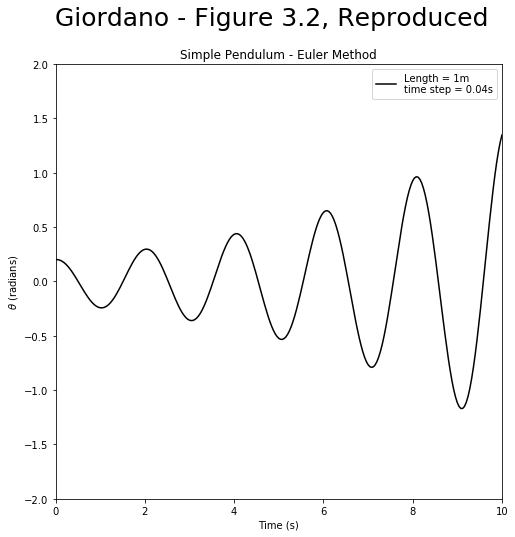

In [4]:
# Create figure
fig, ax = plt.subplots(figsize = [8,8])

# Set Graph Limits
ax.set_xlim([0,10])
ax.set_ylim([-2,2])

# Set figure labels and title
plt.xlabel('Time (s)')
plt.ylabel(r'$\theta$ (radians)')
plt.title('Simple Pendulum - Euler Method')
fig.suptitle("Giordano - Figure 3.2, Reproduced", fontsize = 25)

# Plot the data
plt.plot(t_E, theta_E, color = 'black', linestyle = '-', label = 'Length = 1m\ntime step = 0.04s')
plt.legend(loc = 'upper right')
plt.show()

## Testing the behaviour of Euler's method.

Figure 3.2 is an unphysical result **(explanation to follow in the discussion at the end of this document)**.

To test the behaviour of Euler's method, the value of dt can be altered to see how it affects the shape of the figure.

The following values of dt are used for testing:

Test 1: $dt = 0.08$

Test 2: $dt = 0.04$

Test 3: $dt = 0.02$

and

Test 4: $dt = 0.001$

In [5]:
t_test1, theta_test1, omega_test1 = simple_Pendulum(0.2, 0, 10, 0.08, 'E')
t_test2, theta_test2, omega_test2 = simple_Pendulum(0.2, 0, 10, 0.04, 'E')
t_test3, theta_test3, omega_test3 = simple_Pendulum(0.2, 0, 10, 0.02, 'E')
t_test4, theta_test4, omega_test4 = simple_Pendulum(0.2, 0, 10, 0.001, 'E')

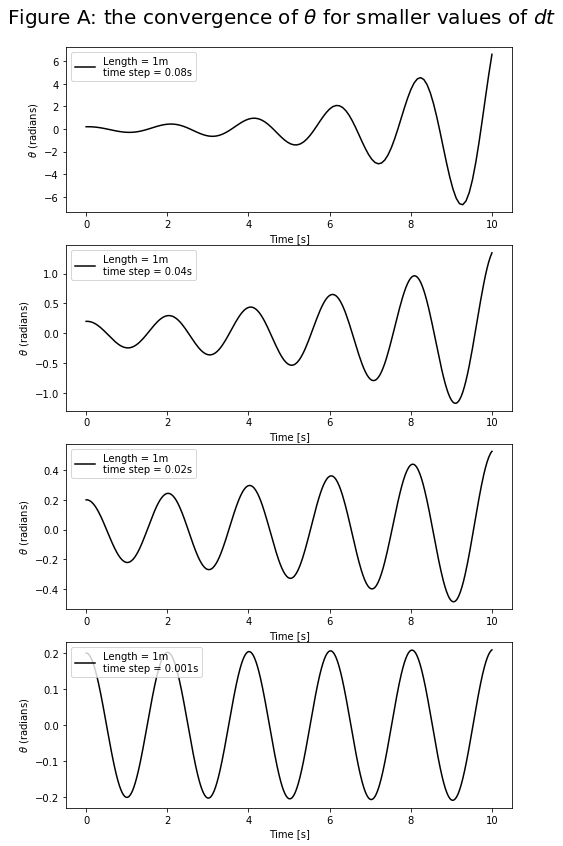

In [6]:
# Create figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize = [8,14])

# Set figure labels
ax1.set_xlabel('Time [s]')
ax1.set_ylabel(r'$\theta$ (radians)')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel(r'$\theta$ (radians)')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel(r'$\theta$ (radians)')
ax4.set_xlabel('Time [s]')
ax4.set_ylabel(r'$\theta$ (radians)')

fig.suptitle(r'Figure A: the convergence of $\theta$ for smaller values of $dt$', fontsize = 20, y = 0.92)

# Plot the data
# --------------

# Test 1
ax1.plot(t_test1, theta_test1, color = 'black', linestyle = '-', label = 'Length = 1m\ntime step = 0.08s')
ax1.legend(loc = 'upper left')

# Test 2
ax2.plot(t_test2, theta_test2, color = 'black', linestyle = '-', label = 'Length = 1m\ntime step = 0.04s')
ax2.legend(loc = 'upper left')

# Test 3
ax3.plot(t_test3, theta_test3, color = 'black', linestyle = '-', label = 'Length = 1m\ntime step = 0.02s')
ax3.legend(loc = 'upper left')

# Test 4
ax4.plot(t_test4, theta_test4, color = 'black', linestyle = '-', label = 'Length = 1m\ntime step = 0.001s')
ax4.legend(loc = 'upper left')

plt.show()

**NOTE**:

From this it can clearly be seen, that the values of $\theta$ **converge as dt becomes smaller and closer to zero.**

## Reproducing Figure 3.3

Similarly, to reproduce Figure 3.3, the Simple_Pendulum function needs to be called to approximate $\theta_i$, and $\omega_i$ for when $\theta_0 = 0.2$ and $\omega_0 = 0$, using the **Euler-Cromer method**.

Measurements are also taken over a range of 10 seconds and in steps of 0.04 seconds. 

### Set Array

In [7]:
t_EC, theta_EC, omega_EC = simple_Pendulum(0.2, 0, 10, 0.04, 'EC')

### Plot Graph

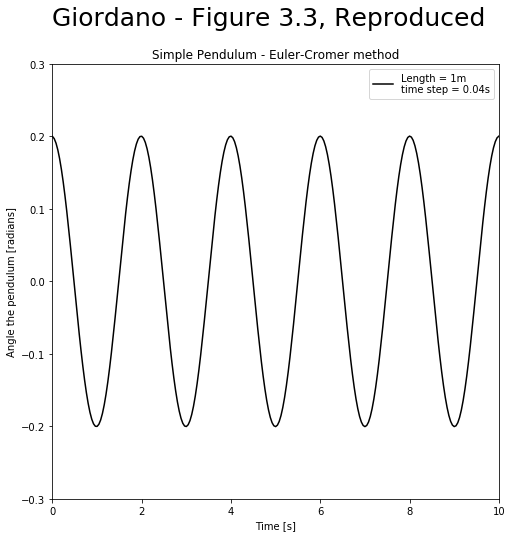

In [8]:
# Create figure
fig, ax = plt.subplots(figsize = [8,8])

# Set Graph Limits
ax.set_xlim([0,10])
ax.set_ylim([-0.3,0.3])

# Set figure labels and title
plt.xlabel('Time [s]')
plt.ylabel('Angle the pendulum [radians]')
plt.title('Simple Pendulum - Euler-Cromer method')
fig.suptitle("Giordano - Figure 3.3, Reproduced", fontsize = 25)

# Plot the data
plt.plot(t_EC, theta_EC, color = 'black', linestyle = '-', label = 'Length = 1m\ntime step = 0.04s')
plt.legend(loc = 'upper right')
plt.show()